In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import os

# Data Load

Abrupt 4xCO2

In [2]:
ROOT_DIR1 = '/g/data/oi10/replicas/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/abrupt-4xCO2/c/Amon/ts/gn/v20190815/'
ROOT_DIR1

In [13]:
nasa_abrupt = xr.open_mfdataset(ROOT_DIR1 + '*.nc', chunks = {'lat':100,'lon':100,'time':50}).ts

In [14]:
nasa_abrupt

<xarray.DataArray 'ts' (time: 1812, lat: 90, lon: 144)>
dask.array<concatenate, shape=(1812, 90, 144), dtype=float32, chunksize=(50, 90, 100), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2000-12-16 12:00:00
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
Attributes:
    standard_name:  surface_temperature
    long_name:      Surface Temperature
    comment:        Temperature of the lower boundary of the atmosphere
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-08-19T19:40:51Z altered by CMOR: replaced missing va...

1pCo2

In [80]:
PCO2_DIR = '/g/data/oi10/replicas/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/1pctCO2/r102i1p1f1/Amon/ts/gn/v20190815/'
nasa_1pc = xr.open_mfdataset(PCO2_DIR + '*.nc', chunks = {'lat':100,'lon':100,'time':50}).ts

In [81]:
nasa_1pc

<xarray.DataArray 'ts' (time: 1812, lat: 90, lon: 144)>
dask.array<concatenate, shape=(1812, 90, 144), dtype=float32, chunksize=(50, 90, 100), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2000-12-16 12:00:00
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
Attributes:
    standard_name:  surface_temperature
    long_name:      Surface Temperature
    comment:        Temperature of the lower boundary of the atmosphere
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-08-17T14:22:54Z altered by CMOR: replaced missing va...

Picontrol

In [120]:
PI_DIR = '/g/data/oi10/replicas/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/piControl/r102i1p1f1/Amon/ts/gn/v20190815/'

In [123]:
nasa_pi = xr.open_mfdataset(PI_DIR + '*.nc', chunks = {'lat':100,'lon':100,'time':50}).ts

In [124]:
nasa_pi

<xarray.DataArray 'ts' (time: 1980, lat: 90, lon: 144)>
dask.array<concatenate, shape=(1980, 90, 144), dtype=float32, chunksize=(50, 90, 100), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
Attributes:
    standard_name:  surface_temperature
    long_name:      Surface Temperature
    comment:        Temperature of the lower boundary of the atmosphere
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-08-16T17:54:13Z altered by CMOR: replaced missing va...

Hist

In [82]:
HIST_DIR = '/g/data/oi10/replicas/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/historical/r102i1p1f1/Amon/ts/gn/v20190815/'
nasa_hist = xr.open_mfdataset(HIST_DIR + '*.nc', chunks = {'lat':100,'lon':100,'time':50}).ts

nasa_hist

<xarray.DataArray 'ts' (time: 1980, lat: 90, lon: 144)>
dask.array<concatenate, shape=(1980, 90, 144), dtype=float32, chunksize=(50, 90, 100), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
Attributes:
    standard_name:  surface_temperature
    long_name:      Surface Temperature
    comment:        Temperature of the lower boundary of the atmosphere
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-08-23T12:49:39Z altered by CMOR: replaced missing va...

# Anomaly Calculation

In [177]:
def yearly_climatology_anomaly(data, hist = None, roll_window = None):
    
    # Climatology calculation.
    
    # If hist data is provided then we calculate the climatology from this data set.
    if type(hist) != 'NoneType':
        # Getting just the years for climatology. This should be for each pixel, the mean temperature
        # from 1850 to 1900. 
        climatology = hist.where(hist.time.dt.year.isin(np.arange(1850,1901)), drop = True).\
                            mean(dim = 'time')
        # The output of this file is the 
        
    # Else the hist data is contained in the main data set
    else:
         # Getting just the years for climatology. This should be for each pixel, the mean temperature
        # from 1850 to 1900. 
        climatology = data.where(data.time.dt.year.isin(np.arange(1850,1901)), drop = True).\
                            mean(dim = 'time')
    
    data_resampled = data.resample(time = 'Y').mean()
    data_anom = (data_resampled - climatology).chunk({'time':8})
    
    # If we also want the rolling data.
    if roll_window:
        data_anom_roll = data_anom.rolling(time = roll_window, min_periods = 1).mean()
        
        return data_anom, data_anom_roll
    return data_anom

In [178]:
nasa_hist_anom, nasa_hist_anom_roll = yearly_climatology_anomaly(nasa_hist, hist = nasa_hist, roll_window = 5)

In [179]:
nasa_double_anom, nasa_double_anom_roll = yearly_climatology_anomaly(nasa_abrupt, hist = nasa_hist, roll_window = 5)

In [180]:
nasa_1pc_anom, nasa_1pc_anom_roll  = yearly_climatology_anomaly(nasa_1pc, hist = nasa_hist, roll_window = 5)

In [181]:
nasa_pi_anom, nasa_pi_anom_roll  = yearly_climatology_anomaly(nasa_pi, hist = nasa_hist, roll_window = 5)

In [182]:
nasa_double_anom

<xarray.DataArray 'ts' (time: 151, lat: 90, lon: 144)>
dask.array<rechunk-merge, shape=(151, 90, 144), dtype=float32, chunksize=(8, 90, 100), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1850-12-31 00:00:00 ... 2000-12-31 00:00:00
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8

The above is the anomalies for each pixel, we want just the anomalies for each year (e.g. take mean over lat and lon).

In [183]:
nasa_hist_anom_tmean = nasa_hist_anom.mean(dim = ['lat','lon'])

nasa_double_anom_tmean = nasa_double_anom.mean(dim = ['lat','lon'])

nasa_1pc_anom_tmean = nasa_1pc_anom.mean(dim = ['lat','lon'])

nasa_pi_anom_tmean = nasa_pi_anom.mean(dim = ['lat','lon'])

In [184]:
nasa_hist_anom_tmean_roll = nasa_hist_anom_roll.mean(dim = ['lat','lon'])

nasa_double_anom_tmean_roll = nasa_double_anom_roll.mean(dim = ['lat','lon'])

nasa_1pc_anom_tmean_roll = nasa_1pc_anom_roll.mean(dim = ['lat','lon'])

nasa_pi_anom_tmean_roll = nasa_pi_anom_roll.mean(dim = ['lat','lon'])

In [185]:
nasa_anom_tmean

<xarray.DataArray 'ts' (time: 151)>
dask.array<mean_agg-aggregate, shape=(151,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1850-12-31 00:00:00 ... 2000-12-31 00:00:00

In [117]:
def plot_line_with_annotation(data, label = '', deltax = 0, deltay = 0):
    ax.plot(data.time.values, data.values)
  
    lines = plt.gca().lines
    line_color = lines[len(lines) - 1].get_color()
  

    x = data.time.values[-1]
    y = data.values[-1]

    ax.annotate(label, xy = (x + pd.to_timedelta(f'{deltax}Y'),y + deltay), color = line_color)
    

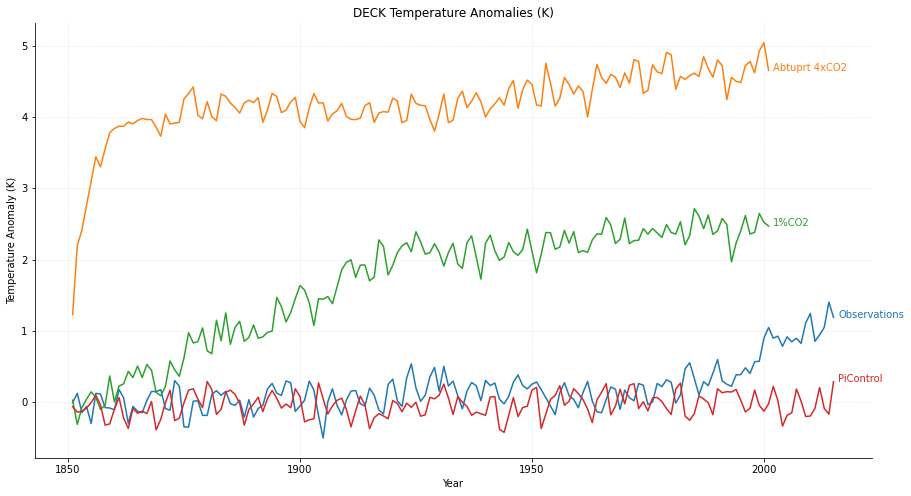

In [191]:
fig, ax = plt.subplots(figsize = (15,8))

plot_line_with_annotation(nasa_hist_anom_tmean, label = 'Observations', deltax = 1)
plot_line_with_annotation(nasa_double_anom_tmean, label = 'Abtuprt 4xCO2', deltax = 1)
plot_line_with_annotation(nasa_1pc_anom_tmean, label = '1%CO2', deltax = 1)
plot_line_with_annotation(nasa_pi_anom_tmean, label = 'PiControl', deltax = 1)


ax.set_title('DECK Temperature Anomalies (K)');

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel('Year')
ax.set_ylabel('Temperature Anomaly (K)')

ax.grid(alpha = 0.4, linestyle = ':')
stor = plt.gca()

fig.savefig('../../images/PhD/init/nasa_deck.png', bbox_inches = 'tight', dpi = 300)

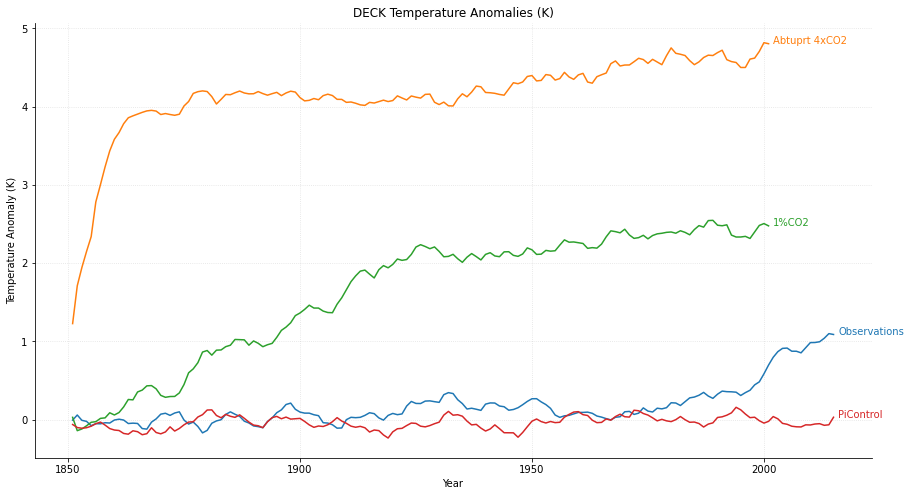

In [190]:
fig, ax = plt.subplots(figsize = (15,8))

plot_line_with_annotation(nasa_hist_anom_tmean_roll, label = 'Observations', deltax = 1)
plot_line_with_annotation(nasa_double_anom_tmean_roll, label = 'Abtuprt 4xCO2', deltax = 1)
plot_line_with_annotation(nasa_1pc_anom_tmean_roll, label = '1%CO2', deltax = 1)
plot_line_with_annotation(nasa_pi_anom_tmean_roll, label = 'PiControl', deltax = 1)


ax.set_title('DECK Temperature Anomalies (K)');

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel('Year')
ax.set_ylabel('Temperature Anomaly (K)')

ax.grid(alpha = 0.4, linestyle = ':')
stor = plt.gca()

fig.savefig('../../images/PhD/init/nasa_deck_roll.png', bbox_inches = 'tight', dpi = 300)